In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
dataset = pd.read_csv("housing.csv")

# EXPLORE

In [5]:
dataset.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
dataset.dtypes[dataset.dtypes != 'object']

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

In [8]:
dataset.dropna(inplace = True)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [10]:
X = dataset.drop("median_house_value",axis=1)
y = dataset['median_house_value']

In [11]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [12]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
train_data = X_train.join(y_train)

In [15]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
19566,-120.96,37.61,23.0,3497.0,887.0,2467.0,816.0,1.9444,INLAND,93400.0
7292,-118.22,33.98,34.0,2225.0,753.0,2980.0,736.0,1.6685,<1H OCEAN,128800.0
17618,-121.94,37.28,27.0,2859.0,464.0,1144.0,430.0,5.0822,<1H OCEAN,327500.0
17518,-121.91,37.34,35.0,2189.0,607.0,1193.0,562.0,2.8042,<1H OCEAN,240900.0
5172,-118.28,33.95,41.0,835.0,208.0,707.0,192.0,1.4103,<1H OCEAN,86200.0
...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,<1H OCEAN,273400.0
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,<1H OCEAN,160800.0
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,<1H OCEAN,335400.0
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,NEAR BAY,231200.0


In [16]:
test_data = X_test.join(y_test)

In [17]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14416,-117.24,32.79,20.0,961.0,278.0,525.0,254.0,3.1838,NEAR OCEAN,245800.0
16383,-121.29,38.01,2.0,6403.0,1116.0,3327.0,957.0,4.4871,INLAND,137900.0
7731,-118.14,33.92,31.0,3731.0,853.0,2313.0,801.0,3.2237,<1H OCEAN,218200.0
1410,-122.07,37.94,30.0,1260.0,276.0,707.0,221.0,2.8920,NEAR BAY,220800.0
1335,-121.89,37.99,4.0,2171.0,597.0,928.0,461.0,4.1016,INLAND,170500.0
...,...,...,...,...,...,...,...,...,...,...
16764,-122.49,37.70,36.0,1946.0,340.0,828.0,313.0,5.2811,NEAR OCEAN,287700.0
5762,-118.29,34.16,31.0,1262.0,338.0,1019.0,332.0,3.7083,<1H OCEAN,241900.0
12862,-121.39,38.69,30.0,2897.0,506.0,1508.0,478.0,3.8650,INLAND,88400.0
18814,-121.45,41.04,33.0,2029.0,378.0,936.0,343.0,2.6700,INLAND,77500.0


In [18]:
sns.set_palette("PuRd")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

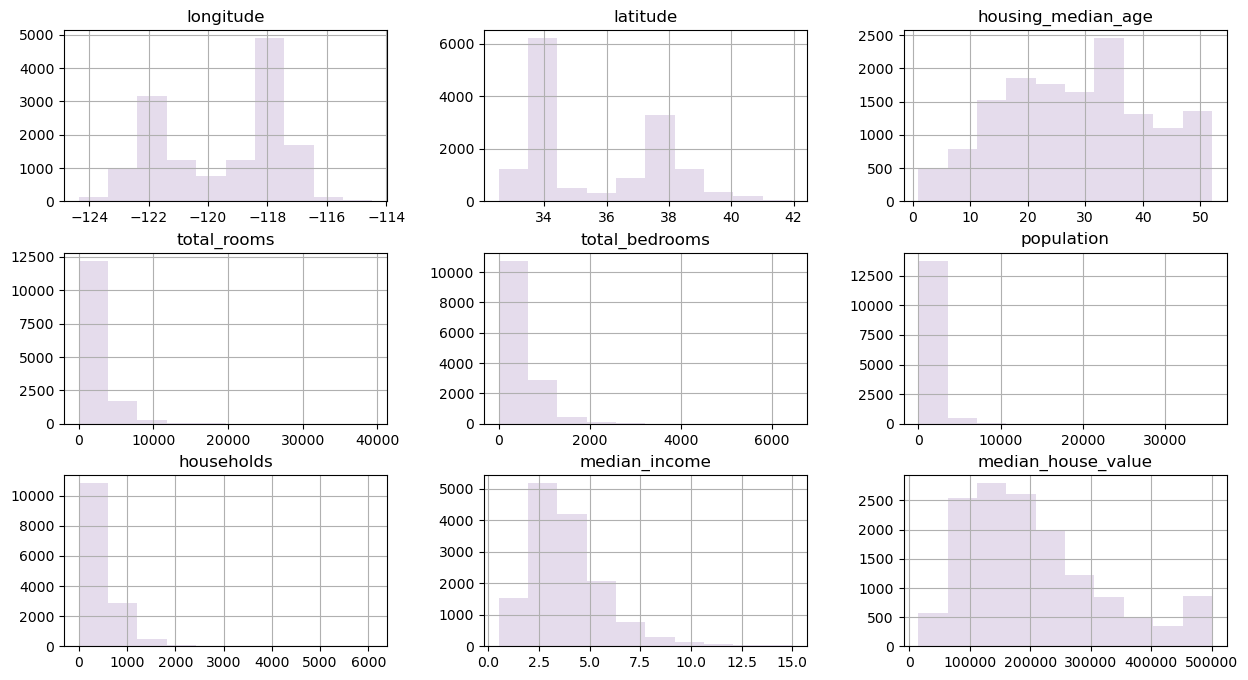

In [19]:
train_data.hist(figsize=(15,8))

In [229]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14416,-117.24,32.79,20.0,961.0,278.0,525.0,254.0,3.1838,245800.0,0,0,0,0,1
16383,-121.29,38.01,2.0,6403.0,1116.0,3327.0,957.0,4.4871,137900.0,0,1,0,0,0
7731,-118.14,33.92,31.0,3731.0,853.0,2313.0,801.0,3.2237,218200.0,1,0,0,0,0
1410,-122.07,37.94,30.0,1260.0,276.0,707.0,221.0,2.8920,220800.0,0,0,0,1,0
1335,-121.89,37.99,4.0,2171.0,597.0,928.0,461.0,4.1016,170500.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16764,-122.49,37.70,36.0,1946.0,340.0,828.0,313.0,5.2811,287700.0,0,0,0,0,1
5762,-118.29,34.16,31.0,1262.0,338.0,1019.0,332.0,3.7083,241900.0,1,0,0,0,0
12862,-121.39,38.69,30.0,2897.0,506.0,1508.0,478.0,3.8650,88400.0,0,1,0,0,0
18814,-121.45,41.04,33.0,2029.0,378.0,936.0,343.0,2.6700,77500.0,0,1,0,0,0


Text(0.5, 1.0, 'Correlation Heatmap')

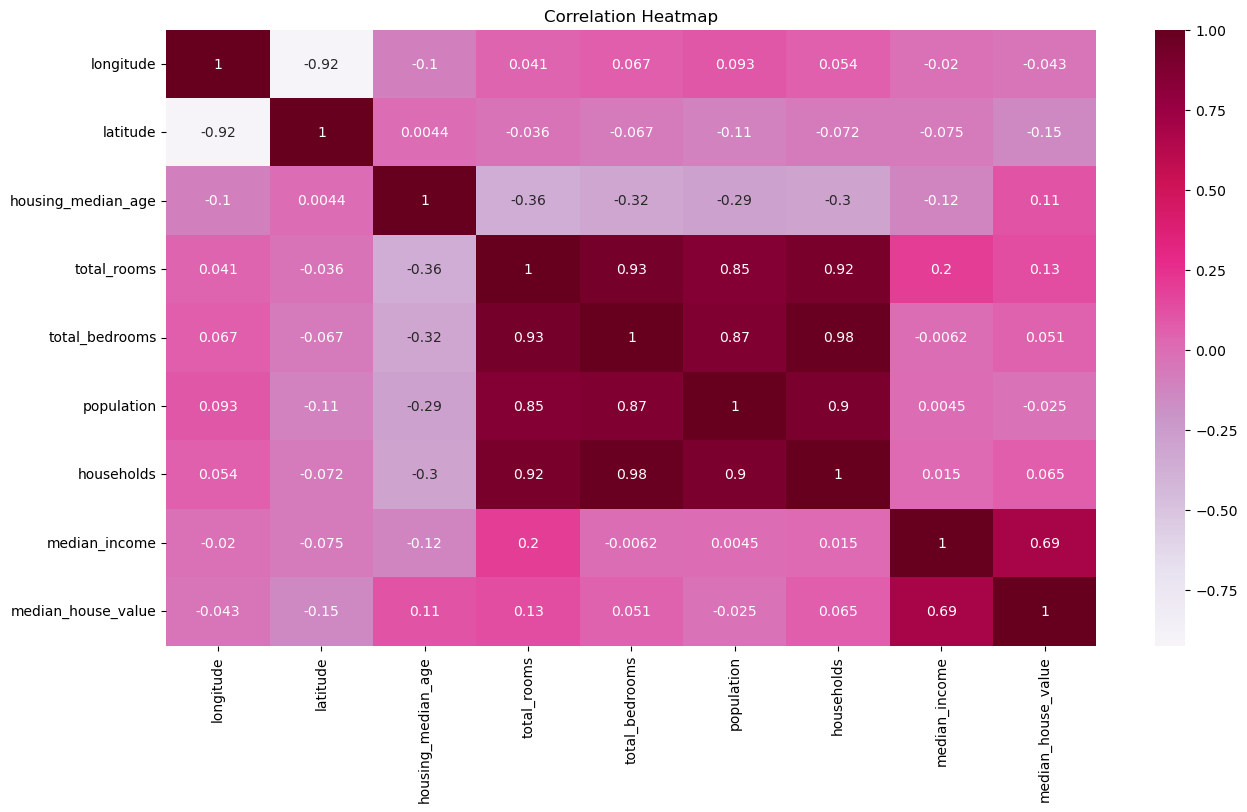

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot = True, cmap="PuRd")
plt.title('Correlation Heatmap')

In [21]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
19566,-120.96,37.61,23.0,3497.0,887.0,2467.0,816.0,1.9444,INLAND,93400.0
7292,-118.22,33.98,34.0,2225.0,753.0,2980.0,736.0,1.6685,<1H OCEAN,128800.0
17618,-121.94,37.28,27.0,2859.0,464.0,1144.0,430.0,5.0822,<1H OCEAN,327500.0
17518,-121.91,37.34,35.0,2189.0,607.0,1193.0,562.0,2.8042,<1H OCEAN,240900.0
5172,-118.28,33.95,41.0,835.0,208.0,707.0,192.0,1.4103,<1H OCEAN,86200.0
...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,<1H OCEAN,273400.0
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,<1H OCEAN,160800.0
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,<1H OCEAN,335400.0
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,NEAR BAY,231200.0


In [22]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14416,-117.24,32.79,20.0,961.0,278.0,525.0,254.0,3.1838,NEAR OCEAN,245800.0
16383,-121.29,38.01,2.0,6403.0,1116.0,3327.0,957.0,4.4871,INLAND,137900.0
7731,-118.14,33.92,31.0,3731.0,853.0,2313.0,801.0,3.2237,<1H OCEAN,218200.0
1410,-122.07,37.94,30.0,1260.0,276.0,707.0,221.0,2.8920,NEAR BAY,220800.0
1335,-121.89,37.99,4.0,2171.0,597.0,928.0,461.0,4.1016,INLAND,170500.0
...,...,...,...,...,...,...,...,...,...,...
16764,-122.49,37.70,36.0,1946.0,340.0,828.0,313.0,5.2811,NEAR OCEAN,287700.0
5762,-118.29,34.16,31.0,1262.0,338.0,1019.0,332.0,3.7083,<1H OCEAN,241900.0
12862,-121.39,38.69,30.0,2897.0,506.0,1508.0,478.0,3.8650,INLAND,88400.0
18814,-121.45,41.04,33.0,2029.0,378.0,936.0,343.0,2.6700,INLAND,77500.0


In [23]:
train_data.dtypes[train_data.dtypes == 'object']

ocean_proximity    object
dtype: object

# PREPROCESS

In [24]:
#To make see whats the distribution would look like (normal distributing)

train_data["total_rooms"] = np.log(train_data["total_rooms"] + 1)
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"] + 1)
train_data["population"] = np.log(train_data["population"] + 1)
train_data["households"] = np.log(train_data["households"] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

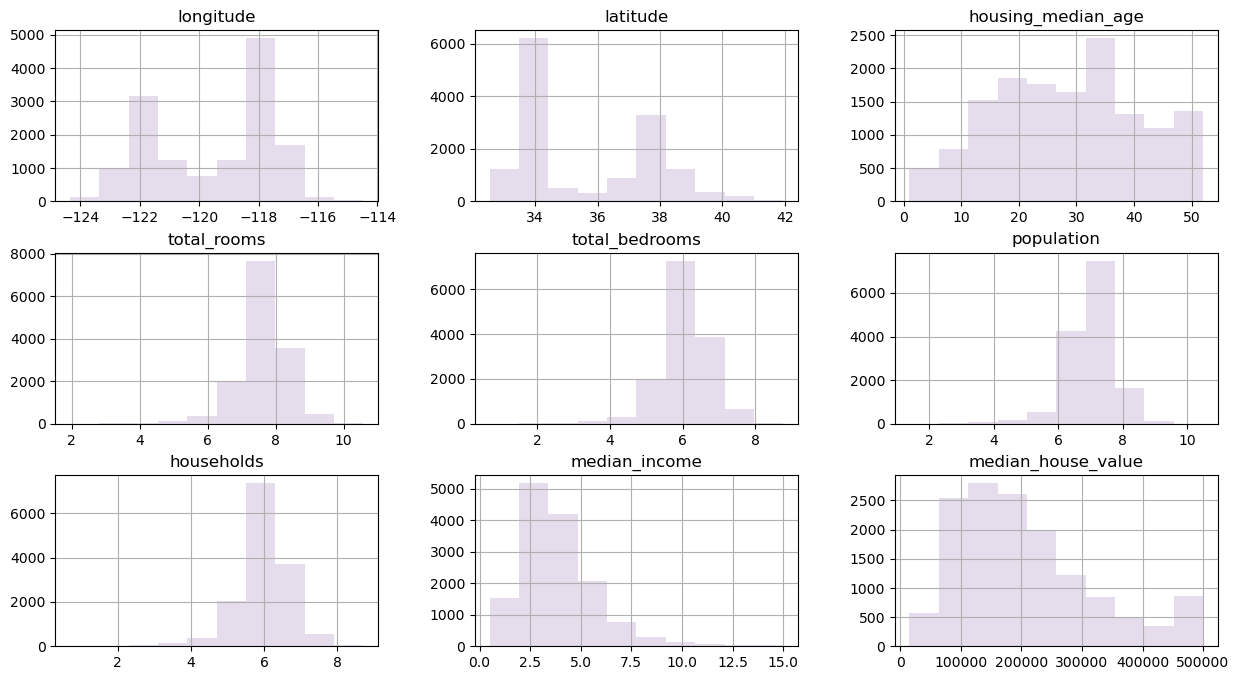

In [25]:
train_data.hist(figsize=(15,8)) #check that data is bell curved 

In [26]:
# making the ocean_proximity numerical since we assumed it might be effective to the prediction 
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity).astype(bool).astype(int)).drop(['ocean_proximity'], axis=1)

In [27]:
# making the ocean_proximity numerical since we assumed it might be effective to the prediction 
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity).astype(bool).astype(int)).drop(['ocean_proximity'], axis=1)

In [28]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14416,-117.24,32.79,20.0,961.0,278.0,525.0,254.0,3.1838,245800.0,0,0,0,0,1
16383,-121.29,38.01,2.0,6403.0,1116.0,3327.0,957.0,4.4871,137900.0,0,1,0,0,0
7731,-118.14,33.92,31.0,3731.0,853.0,2313.0,801.0,3.2237,218200.0,1,0,0,0,0
1410,-122.07,37.94,30.0,1260.0,276.0,707.0,221.0,2.8920,220800.0,0,0,0,1,0
1335,-121.89,37.99,4.0,2171.0,597.0,928.0,461.0,4.1016,170500.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16764,-122.49,37.70,36.0,1946.0,340.0,828.0,313.0,5.2811,287700.0,0,0,0,0,1
5762,-118.29,34.16,31.0,1262.0,338.0,1019.0,332.0,3.7083,241900.0,1,0,0,0,0
12862,-121.39,38.69,30.0,2897.0,506.0,1508.0,478.0,3.8650,88400.0,0,1,0,0,0
18814,-121.45,41.04,33.0,2029.0,378.0,936.0,343.0,2.6700,77500.0,0,1,0,0,0


In [29]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
19566,-120.96,37.61,23.0,8.159947,6.788972,7.811163,6.705639,1.9444,93400.0,0,1,0,0,0
7292,-118.22,33.98,34.0,7.707962,6.625392,8.000014,6.602588,1.6685,128800.0,1,0,0,0,0
17618,-121.94,37.28,27.0,7.958577,6.142037,7.043160,6.066108,5.0822,327500.0,1,0,0,0,0
17518,-121.91,37.34,35.0,7.691657,6.410175,7.085064,6.333280,2.8042,240900.0,1,0,0,0,0
5172,-118.28,33.95,41.0,6.728629,5.342334,6.562444,5.262690,1.4103,86200.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,8.003697,6.216606,7.271009,6.118097,5.4286,273400.0,1,0,0,0,0
12081,-117.54,33.76,5.0,8.673684,6.943122,8.089176,6.909753,4.7965,160800.0,1,0,0,0,0
5447,-118.42,34.01,42.0,7.374629,5.913503,6.859615,5.894403,3.0990,335400.0,1,0,0,0,0
866,-122.04,37.57,12.0,8.651724,6.970730,8.142354,6.964136,5.2879,231200.0,0,0,0,1,0


Text(0.5, 1.0, 'Correlation Heatmap')

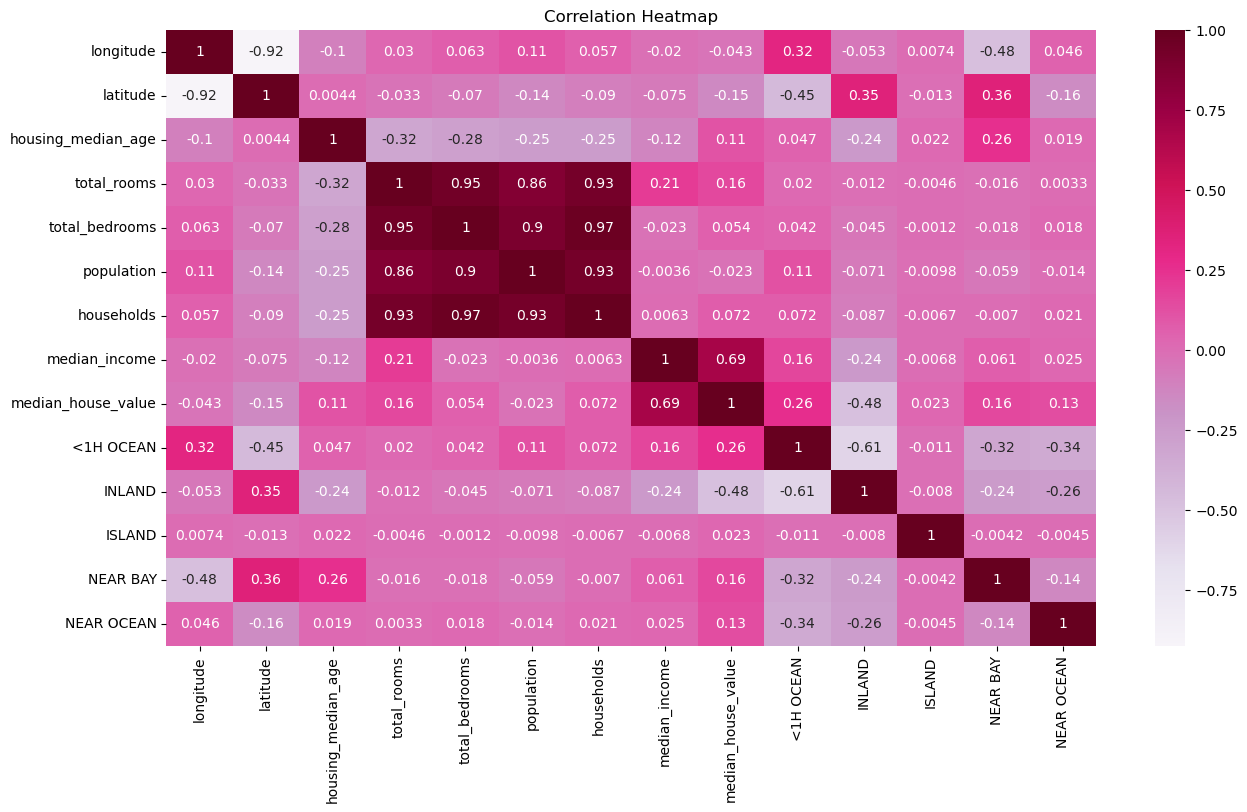

In [30]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot = True,  cmap="PuRd")
plt.title('Correlation Heatmap')

<Axes: xlabel='latitude', ylabel='longitude'>

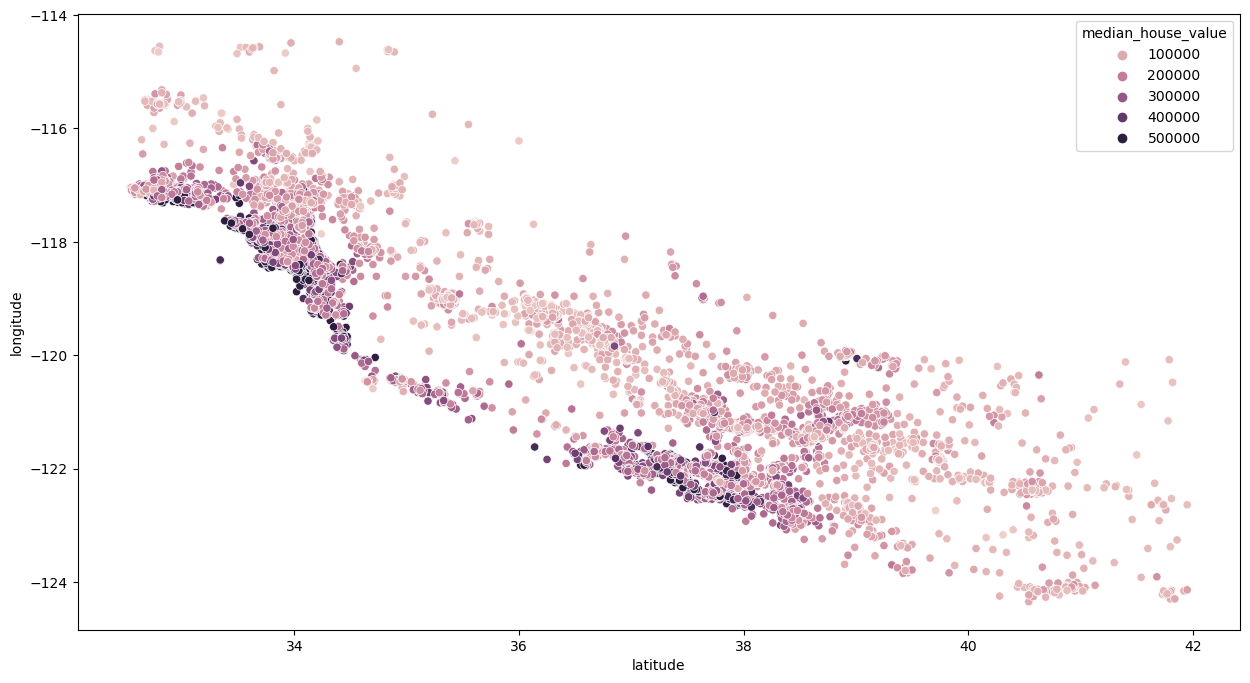

In [31]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude", data = train_data, hue="median_house_value")
# you can see the houses closer to the coast are more expensive

In [32]:
# adding features 
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

In [33]:
# adding features 
test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']

Text(0.5, 1.0, 'Correlation Heatmap')

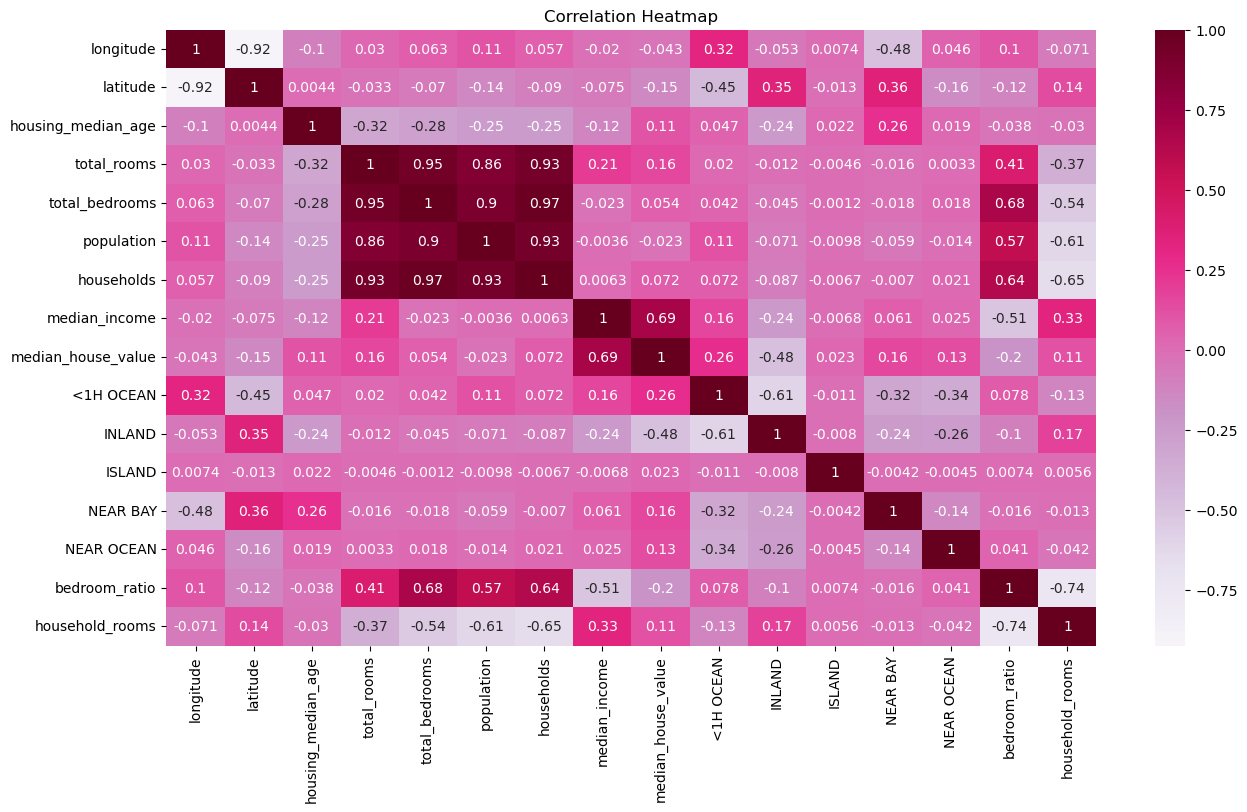

In [34]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot = True, cmap="PuRd" )
plt.title('Correlation Heatmap')

# OUTLIERS

In [35]:
from scipy.stats import zscore
from scipy import stats

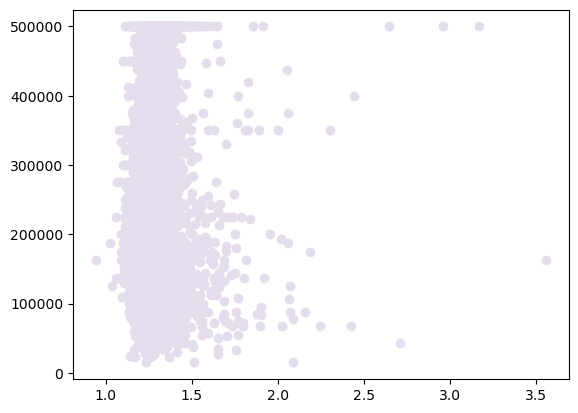

In [36]:
plt.scatter(x='household_rooms', y='median_house_value', data=train_data)

In [37]:
train_data.query('household_rooms > 2.70')
#Drop  13139

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
1914,-120.10,38.91,33.0,7.353722,5.645447,3.433987,2.484907,1.8750,500001.0,0,1,0,0,0,0.767699,2.959356
13979,-116.76,34.14,4.0,3.761200,2.397895,2.302585,1.386294,0.5360,42500.0,0,1,0,0,0,0.637535,2.713132
2511,-119.54,36.51,36.0,3.912023,2.079442,3.367296,1.098612,4.6250,162500.0,0,1,0,0,0,0.531551,3.560877
16171,-122.50,37.79,52.0,2.197225,0.693147,2.639057,0.693147,15.0001,500001.0,0,0,0,1,0,0.315465,3.169925


In [38]:
stats.zscore(train_data['household_rooms']).sort_values().tail(20)

1102      9.323798
1913      9.661894
4093      9.722972
1867      9.733338
19736     9.771643
2395      9.891241
12447     9.906988
1240     10.063652
19802    10.122429
12344    10.940165
11832    11.347153
2510     12.062555
1566     12.769874
11862    14.271396
18504    14.516593
5538     17.085369
13979    17.892353
1914     20.969108
16171    23.600340
2511     28.485593
Name: household_rooms, dtype: float64

In [39]:
# Assuming train_data is your DataFrame and 'household_rooms' is a column containing these values
train_data = train_data[train_data['household_rooms'] < 10]  # Adjust the threshold as needed


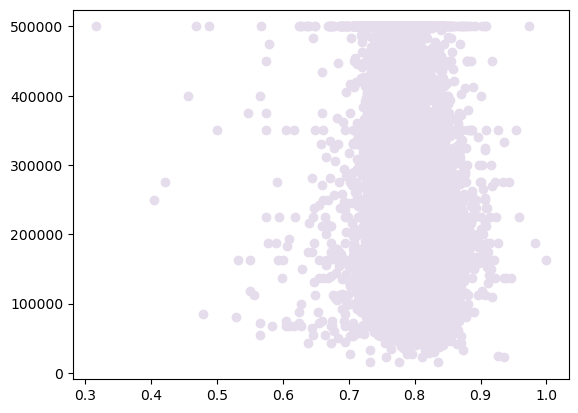

In [40]:
plt.scatter(x='bedroom_ratio', y='median_house_value', data=train_data)

In [41]:
train_data.query('bedroom_ratio < 0.40')
#Drop  16171

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
16171,-122.5,37.79,52.0,2.197225,0.693147,2.639057,0.693147,15.0001,500001.0,0,0,0,1,0,0.315465,3.169925


In [42]:
train_data.query('bedroom_ratio > 0.990')
#Drop  5916

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
5916,-118.44,34.28,46.0,2.484907,2.484907,3.218876,2.639057,2.875,162500.0,1,0,0,0,0,1.0,0.941589


In [43]:
stats.zscore(train_data['bedroom_ratio']).sort_values().tail(20)

4586     3.443418
14325    3.510271
4582     3.553469
4602     3.562629
4593     3.572734
4638     3.665132
4584     3.668926
2779     3.672892
4585     3.863046
4639     3.926358
16186    3.933656
4263     3.936264
4587     4.027861
4588     4.152044
12484    4.224208
4556     4.422760
4550     4.530516
4559     4.966835
17820    5.191657
5916     5.685840
Name: bedroom_ratio, dtype: float64

In [44]:
# Assuming train_data is your DataFrame and 'bedroom_ratio' is a column containing these values
train_data = train_data[train_data['bedroom_ratio'] < 3.5]  # Adjust the threshold as needed


In [45]:
stats.zscore(train_data['longitude']).sort_values().tail(20)

12444    2.453551
2779     2.463536
13926    2.463536
12448    2.463536
13930    2.468529
2781     2.473521
13929    2.483507
12455    2.483507
13928    2.483507
12456    2.488499
12454    2.493492
12457    2.498485
12459    2.498485
12451    2.503477
12452    2.503477
12453    2.503477
12450    2.508470
2780     2.513463
12447    2.543419
13923    2.553404
Name: longitude, dtype: float64

In [46]:
stats.zscore(train_data['latitude']).sort_values().tail(20)

1858     2.854614
18835    2.854614
1856     2.859296
1852     2.859296
18839    2.863978
1853     2.868661
1854     2.873343
9659     2.873343
9664     2.878026
18830    2.882708
1851     2.882708
1850     2.882708
18826    2.887390
1862     2.887390
9663     2.892073
1861     2.901437
18829    2.910802
1860     2.938896
1859     2.952943
18828    2.952943
Name: latitude, dtype: float64

In [47]:
from scipy.stats import zscore

# Assuming latitudes and longitudes are stored in separate columns of a DataFrame
latitude_z_scores = zscore(train_data['latitude'])
longitude_z_scores = zscore(train_data['longitude'])

# Define a threshold for outlier detection
z_score_threshold = 2  # Adjust as needed

# Find outliers for latitude and longitude separately
latitude_outliers = train_data[abs(latitude_z_scores) > z_score_threshold]
longitude_outliers = train_data[abs(longitude_z_scores) > z_score_threshold]


In [48]:
latitude_outliers

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
2547,-124.18,40.79,39.0,7.515889,5.866468,6.784457,5.823046,1.7450,70500.0,0,0,0,0,1,0.780542,1.290714
3363,-120.36,40.45,19.0,6.536692,4.969813,5.874931,4.852030,1.7333,70000.0,0,1,0,0,0,0.760295,1.347208
2604,-124.06,41.13,22.0,8.090709,6.684612,7.233455,6.361302,2.4708,119400.0,0,0,0,0,1,0.826208,1.271864
2584,-124.07,40.87,47.0,7.476472,5.789960,6.680855,5.811141,2.2138,99200.0,0,0,0,0,1,0.774424,1.286576
18788,-122.45,40.46,16.0,7.913887,6.218600,7.254178,6.184149,2.8085,105700.0,0,1,0,0,0,0.785783,1.279705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2576,-124.13,40.79,29.0,7.813996,6.118097,7.030857,6.059123,2.8833,83000.0,0,0,0,0,1,0.782967,1.289625
19747,-122.24,40.19,29.0,7.556428,5.820083,6.756932,5.786897,3.7000,70500.0,0,1,0,0,0,0.770216,1.305782
19734,-122.17,40.20,28.0,7.486053,5.814131,6.773080,5.743003,3.3594,79100.0,0,1,0,0,0,0.776662,1.303508
2588,-124.15,40.88,33.0,7.712444,6.228511,7.061334,6.091310,1.7250,57500.0,0,0,0,0,1,0.807592,1.266139


In [49]:
longitude_outliers

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
2547,-124.18,40.79,39.0,7.515889,5.866468,6.784457,5.823046,1.7450,70500.0,0,0,0,0,1,0.780542,1.290714
2604,-124.06,41.13,22.0,8.090709,6.684612,7.233455,6.361302,2.4708,119400.0,0,0,0,0,1,0.826208,1.271864
2584,-124.07,40.87,47.0,7.476472,5.789960,6.680855,5.811141,2.2138,99200.0,0,0,0,0,1,0.774424,1.286576
2655,-124.35,40.54,52.0,7.507141,5.707110,6.693324,5.602119,3.0147,94600.0,0,0,0,0,1,0.760224,1.340054
2627,-124.14,40.72,18.0,7.856320,6.214608,7.226936,6.222576,2.8446,100500.0,0,0,0,0,1,0.791033,1.262551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760,-115.52,32.67,6.0,7.939159,6.366470,7.940228,6.388561,2.0625,67700.0,0,1,0,0,0,0.801907,1.242715
2576,-124.13,40.79,29.0,7.813996,6.118097,7.030857,6.059123,2.8833,83000.0,0,0,0,0,1,0.782967,1.289625
2717,-115.57,32.80,16.0,7.176255,5.886104,6.869014,5.793014,1.1853,72600.0,0,1,0,0,0,0.820220,1.238777
2588,-124.15,40.88,33.0,7.712444,6.228511,7.061334,6.091310,1.7250,57500.0,0,0,0,0,1,0.807592,1.266139


In [50]:
# Combine outliers from both latitude and longitude
combined_outliers = pd.concat([latitude_outliers, longitude_outliers], ignore_index=True)

In [51]:
combined_outliers

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
0,-124.18,40.79,39.0,7.515889,5.866468,6.784457,5.823046,1.7450,70500.0,0,0,0,0,1,0.780542,1.290714
1,-120.36,40.45,19.0,6.536692,4.969813,5.874931,4.852030,1.7333,70000.0,0,1,0,0,0,0.760295,1.347208
2,-124.06,41.13,22.0,8.090709,6.684612,7.233455,6.361302,2.4708,119400.0,0,0,0,0,1,0.826208,1.271864
3,-124.07,40.87,47.0,7.476472,5.789960,6.680855,5.811141,2.2138,99200.0,0,0,0,0,1,0.774424,1.286576
4,-122.45,40.46,16.0,7.913887,6.218600,7.254178,6.184149,2.8085,105700.0,0,1,0,0,0,0.785783,1.279705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,-115.52,32.67,6.0,7.939159,6.366470,7.940228,6.388561,2.0625,67700.0,0,1,0,0,0,0.801907,1.242715
472,-124.13,40.79,29.0,7.813996,6.118097,7.030857,6.059123,2.8833,83000.0,0,0,0,0,1,0.782967,1.289625
473,-115.57,32.80,16.0,7.176255,5.886104,6.869014,5.793014,1.1853,72600.0,0,1,0,0,0,0.820220,1.238777
474,-124.15,40.88,33.0,7.712444,6.228511,7.061334,6.091310,1.7250,57500.0,0,0,0,0,1,0.807592,1.266139


In [52]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
19566,-120.96,37.61,23.0,8.159947,6.788972,7.811163,6.705639,1.9444,93400.0,0,1,0,0,0,0.831987,1.216878
7292,-118.22,33.98,34.0,7.707962,6.625392,8.000014,6.602588,1.6685,128800.0,1,0,0,0,0,0.859552,1.167415
17618,-121.94,37.28,27.0,7.958577,6.142037,7.043160,6.066108,5.0822,327500.0,1,0,0,0,0,0.771751,1.311974
17518,-121.91,37.34,35.0,7.691657,6.410175,7.085064,6.333280,2.8042,240900.0,1,0,0,0,0,0.833393,1.214482
5172,-118.28,33.95,41.0,6.728629,5.342334,6.562444,5.262690,1.4103,86200.0,1,0,0,0,0,0.793971,1.278553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,8.003697,6.216606,7.271009,6.118097,5.4286,273400.0,1,0,0,0,0,0.776717,1.308200
12081,-117.54,33.76,5.0,8.673684,6.943122,8.089176,6.909753,4.7965,160800.0,1,0,0,0,0,0.800481,1.255281
5447,-118.42,34.01,42.0,7.374629,5.913503,6.859615,5.894403,3.0990,335400.0,1,0,0,0,0,0.801871,1.251124
866,-122.04,37.57,12.0,8.651724,6.970730,8.142354,6.964136,5.2879,231200.0,0,0,0,1,0,0.805704,1.242326


In [53]:
# drop outliers -LONG-AND-LAT

# Get the indices of longitude outliers
combined_outliers_indices = combined_outliers.index

# Filter out rows where the index is not in longitude_outlier_indices
train_data = train_data[~train_data.index.isin(combined_outliers_indices)]


In [54]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
19566,-120.96,37.61,23.0,8.159947,6.788972,7.811163,6.705639,1.9444,93400.0,0,1,0,0,0,0.831987,1.216878
7292,-118.22,33.98,34.0,7.707962,6.625392,8.000014,6.602588,1.6685,128800.0,1,0,0,0,0,0.859552,1.167415
17618,-121.94,37.28,27.0,7.958577,6.142037,7.043160,6.066108,5.0822,327500.0,1,0,0,0,0,0.771751,1.311974
17518,-121.91,37.34,35.0,7.691657,6.410175,7.085064,6.333280,2.8042,240900.0,1,0,0,0,0,0.833393,1.214482
5172,-118.28,33.95,41.0,6.728629,5.342334,6.562444,5.262690,1.4103,86200.0,1,0,0,0,0,0.793971,1.278553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,8.003697,6.216606,7.271009,6.118097,5.4286,273400.0,1,0,0,0,0,0.776717,1.308200
12081,-117.54,33.76,5.0,8.673684,6.943122,8.089176,6.909753,4.7965,160800.0,1,0,0,0,0,0.800481,1.255281
5447,-118.42,34.01,42.0,7.374629,5.913503,6.859615,5.894403,3.0990,335400.0,1,0,0,0,0,0.801871,1.251124
866,-122.04,37.57,12.0,8.651724,6.970730,8.142354,6.964136,5.2879,231200.0,0,0,0,1,0,0.805704,1.242326


In [56]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
14416,-117.24,32.79,20.0,961.0,278.0,525.0,254.0,3.1838,245800.0,0,0,0,0,1,0.289282,3.783465
16383,-121.29,38.01,2.0,6403.0,1116.0,3327.0,957.0,4.4871,137900.0,0,1,0,0,0,0.174293,6.690700
7731,-118.14,33.92,31.0,3731.0,853.0,2313.0,801.0,3.2237,218200.0,1,0,0,0,0,0.228625,4.657928
1410,-122.07,37.94,30.0,1260.0,276.0,707.0,221.0,2.8920,220800.0,0,0,0,1,0,0.219048,5.701357
1335,-121.89,37.99,4.0,2171.0,597.0,928.0,461.0,4.1016,170500.0,0,1,0,0,0,0.274988,4.709328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16764,-122.49,37.70,36.0,1946.0,340.0,828.0,313.0,5.2811,287700.0,0,0,0,0,1,0.174717,6.217252
5762,-118.29,34.16,31.0,1262.0,338.0,1019.0,332.0,3.7083,241900.0,1,0,0,0,0,0.267829,3.801205
12862,-121.39,38.69,30.0,2897.0,506.0,1508.0,478.0,3.8650,88400.0,0,1,0,0,0,0.174663,6.060669
18814,-121.45,41.04,33.0,2029.0,378.0,936.0,343.0,2.6700,77500.0,0,1,0,0,0,0.186299,5.915452


In [57]:
from sklearn.preprocessing import StandardScaler
X_train, y_train = train_data.drop("median_house_value",axis=1),train_data['median_house_value']
scaler = StandardScaler()
y_train = np.array(y_train).reshape(-1, 1)
y_train_scaled = scaler.fit_transform(y_train)

X_train_scaled = scaler.fit_transform(X_train)

In [58]:
X_test, y_test = test_data.drop("median_house_value",axis=1),test_data['median_house_value']
X_test_scaled = scaler.fit_transform(X_test)
y_train_scaled = scaler.fit_transform(y_test)

In [68]:
y_train

array([[ 93400.],
       [128800.],
       [327500.],
       ...,
       [335400.],
       [231200.],
       [251800.]])

# SVM MODEL

In [59]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf', C=20, epsilon=0.1)
regressor.fit(X_train_scaled, y_train_scaled)

SVR(C=20)

In [70]:
regressor.score(X_train_scaled, y_train_scaled)

0.8352584895209059

In [63]:
y_pred = regressor.predict(X_test_scaled)